<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/NLP/exam/Category4_BBC-Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.fugure_format = 'retina'
def plot_loss_acc(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(acc)) # Get number of epochs
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     acc, label='Training accuracy' )
  plt.plot  ( epochs, val_acc, label='Validation accuracy' )
  plt.title ('Training and validation accuracy')
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     loss, label='Training loss' )
  plt.plot  ( epochs, val_loss, label='Validation loss' )
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title ('Training and validation loss'   )

In [95]:
# ===================================================================================================
# PROBLEM B4
#
# Build and train a classifier for the BBC-text dataset.
# This is a multiclass classification problem.
# Do not use lambda layers in your model.
#
# The dataset used in this problem is originally published in: http://mlg.ucd.ie/datasets/bbc.html.
#
# Desired accuracy and validation_accuracy > 91%
# ===================================================================================================
import numpy as np
# from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pandas as pd
import csv
import matplotlib.pyplot as plt

def solution_model():
    bbc = pd.read_csv('https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv')
    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or you can not pass this test
    vocab_size = 1000
    embedding_dim = 16
    max_length = 120
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"
    training_portion = .8

    # YOUR CODE HERE
    # Using "shuffle=False"
    # def remove_stopwords(sentence):
    #     # List of stopwords
    #     stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as",
    #                  "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could",
    #                  "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had",
    #                  "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself",
    #                  "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
    #                  "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of",
    #                  "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own",
    #                  "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that",
    #                  "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these",
    #                  "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too",
    #                  "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what",
    #                  "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why",
    #                  "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours",
    #                  "yourself", "yourselves"]
    #
    #     # Sentence converted to lowercase-only
    #     sentence = sentence.lower()
    #
    #     words = sentence.split()
    #     no_words = [w for w in words if w not in stopwords]
    #     sentence = " ".join(no_words)
    #
    #     return sentence

    sentences = []
    labels = []
    for _, row in bbc.iterrows():
        labels.append(row[0])
        sentences.append(row[1])

    train_size = int(len(sentences) * training_portion)
    training_sentences = sentences[:train_size]
    training_labels = labels[:train_size]
    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    # training_sentences, validation_sentences = #YOUR CODE HERE
    # training_labels, validation_labels = #YOUR CODE HERE

    # Fit your tokenizer with training data
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)

    def seq_pad_trunc(sen, tokenizer, padding, truncating, maxlen):
        sequences = tokenizer.texts_to_sequences(sen)
        pad_trunc_seq = pad_sequences(sequences, maxlen=maxlen, padding=padding, truncating=truncating)
        return pad_trunc_seq

    train_pad_seq_trunc = seq_pad_trunc(training_sentences, tokenizer, padding_type, trunc_type, max_length)
    val_pad_seq_trunc = seq_pad_trunc(validation_sentences, tokenizer, padding_type, trunc_type, max_length)

    # You can also use Tokenizer to encode your label.
    label_tokenizer = Tokenizer()
    label_tokenizer.fit_on_texts(labels)
    train_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
    val_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

    model = tf.keras.Sequential([
        # YOUR CODE HERE.
        # YOUR CODE HERE. DO not change the last layer or test may fail
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    tf.keras.backend.clear_session()

    lr = 1.0000e-03
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    # Make sure you are using "sparse_categorical_crossentropy" as a loss fuction
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=['accuracy']
    )

    #callbacks
    MCP = tf.keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='auto', save_best_only=True, save_weights_only=False, verbose=1)
    RLP = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=3, verbose=1, mode="auto") #, cooldown=7, patience=5, min_lr=0.000000001
    ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1) #min_delta=1e-4, #patience=5

    history = model.fit(train_pad_seq_trunc, train_label_seq, epochs=100, validation_data=(val_pad_seq_trunc, val_label_seq), verbose=1, callbacks=[MCP, RLP, ES])
    return model

    # The code below is to save your model as a .h5 file.
    # It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_model()
    model.save("mymodel.h5")

Epoch 1/100
41/56 [====================>.........] - ETA: 0s - loss: 1.7654 - accuracy: 0.2912
Epoch 1: val_accuracy improved from -inf to 0.42247, saving model to bestmodel.h5
56/56 [==============================] - 1s 8ms/step - loss: 1.7527 - accuracy: 0.3298 - val_loss: 1.7005 - val_accuracy: 0.4225 - lr: 0.0010
Epoch 2/100
39/56 [===================>..........] - ETA: 0s - loss: 1.6656 - accuracy: 0.4095

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.42247 to 0.45169, saving model to bestmodel.h5
56/56 [==============================] - 0s 4ms/step - loss: 1.6475 - accuracy: 0.4331 - val_loss: 1.6019 - val_accuracy: 0.4517 - lr: 0.0010
Epoch 3/100
54/56 [===========================>..] - ETA: 0s - loss: 1.5581 - accuracy: 0.4502
Epoch 3: val_accuracy improved from 0.45169 to 0.45393, saving model to bestmodel.h5
56/56 [==============================] - 0s 4ms/step - loss: 1.5572 - accuracy: 0.4483 - val_loss: 1.5153 - val_accuracy: 0.4539 - lr: 0.0010
Epoch 4/100
53/56 [===========================>..] - ETA: 0s - loss: 1.4561 - accuracy: 0.4540
Epoch 4: val_accuracy improved from 0.45393 to 0.46067, saving model to bestmodel.h5
56/56 [==============================] - 0s 4ms/step - loss: 1.4511 - accuracy: 0.4556 - val_loss: 1.3963 - val_accuracy: 0.4607 - lr: 0.0010
Epoch 5/100
48/56 [========================>.....] - ETA: 0s - loss: 1.3064 - accuracy: 0.4688
Epoch 5: val_accuracy improved fr

In [25]:
# import numpy as np
# # from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import tensorflow as tf
# import pandas as pd
# import csv
# import matplotlib.pyplot as plt


In [3]:
# bbc = pd.read_csv('https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv')
# # DO NOT CHANGE THIS CODE
# # Make sure you used all of these parameters or you can not pass this test
# vocab_size = 1000
# embedding_dim = 16
# max_length = 120
# trunc_type = 'post'
# padding_type = 'post'
# oov_tok = "<OOV>"
# training_portion = .8

In [ ]:
# YOUR CODE HERE
# Using "shuffle=False"
# def remove_stopwords(sentence):
#     # List of stopwords
#     stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as",
#                  "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could",
#                  "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had",
#                  "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself",
#                  "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
#                  "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of",
#                  "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own",
#                  "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that",
#                  "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these",
#                  "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too",
#                  "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what",
#                  "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why",
#                  "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours",
#                  "yourself", "yourselves"]
#
#     # Sentence converted to lowercase-only
#     sentence = sentence.lower()
#
#     words = sentence.split()
#     no_words = [w for w in words if w not in stopwords]
#     sentence = " ".join(no_words)
#
#     return sentence

In [4]:
# sentences = []
# labels = []
# for _, row in bbc.iterrows():
#     labels.append(row[0])
#     sentences.append(row[1])

In [5]:
# train_size = int(len(sentences) * training_portion)
# training_sentences = sentences[:train_size]
# training_labels = labels[:train_size]
# validation_sentences = sentences[train_size:]
# validation_labels = labels[train_size:]

# # training_sentences, validation_sentences = #YOUR CODE HERE
# # training_labels, validation_labels = #YOUR CODE HERE

In [6]:
# # Fit your tokenizer with training data
# tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sentences)

In [7]:
# def seq_pad_trunc(sen, tokenizer, padding, truncating, maxlen):
#   sequences = tokenizer.texts_to_sequences(sen)
#   pad_trunc_seq = pad_sequences(sequences, maxlen=maxlen, padding=padding, truncating=truncating)
#   return pad_trunc_seq

In [8]:

# train_pad_seq_trunc = seq_pad_trunc(training_sentences, tokenizer, padding_type, trunc_type, max_length)
# val_pad_seq_trunc = seq_pad_trunc(validation_sentences, tokenizer, padding_type, trunc_type, max_length)

In [9]:
# # You can also use Tokenizer to encode your label.
# label_tokenizer = Tokenizer()
# label_tokenizer.fit_on_texts(labels)
# train_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
# val_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [89]:
# model = tf.keras.Sequential([
#     # YOUR CODE HERE.
#     # YOUR CODE HERE. DO not change the last layer or test may fail
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(6, activation='softmax')
# ])

In [90]:
# tf.keras.backend.clear_session()

In [91]:
# lr = 1.0000e-03
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# # Make sure you are using "sparse_categorical_crossentropy" as a loss fuction
# model.compile(
#     loss="sparse_categorical_crossentropy",
#     optimizer=optimizer,
#     metrics=['accuracy']
# )

In [92]:
# MCP = tf.keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='auto', save_best_only=True, save_weights_only=False, verbose=1)
# RLP = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=3, verbose=1, mode="auto") #, cooldown=7, patience=5, min_lr=0.000000001
# ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1) #min_delta=1e-4, #patience=5

In [93]:
# history = model.fit(train_pad_seq_trunc, train_label_seq, epochs=100, validation_data=(val_pad_seq_trunc, val_label_seq), verbose=1, callbacks=[MCP, RLP, ES])

Epoch 1/100
41/56 [====================>.........] - ETA: 0s - loss: 1.7706 - accuracy: 0.2462
Epoch 1: val_accuracy improved from -inf to 0.22697, saving model to bestmodel.h5
56/56 [==============================] - 1s 7ms/step - loss: 1.7612 - accuracy: 0.2472 - val_loss: 1.7222 - val_accuracy: 0.2270 - lr: 0.0010
Epoch 2/100
40/56 [====================>.........] - ETA: 0s - loss: 1.6926 - accuracy: 0.2234
Epoch 2: val_accuracy did not improve from 0.22697
56/56 [==============================] - 0s 4ms/step - loss: 1.6796 - accuracy: 0.2303 - val_loss: 1.6345 - val_accuracy: 0.2270 - lr: 0.0010
Epoch 3/100
37/56 [==================>...........] - ETA: 0s - loss: 1.6066 - accuracy: 0.2416
Epoch 3: val_accuracy improved from 0.22697 to 0.31011, saving model to bestmodel.h5
56/56 [==============================] - 0s 5ms/step - loss: 1.5990 - accuracy: 0.2354 - val_loss: 1.5638 - val_accuracy: 0.3101 - lr: 0.0010
Epoch 4/100
48/56 [========================>.....] - ETA: 0s - loss: 1.

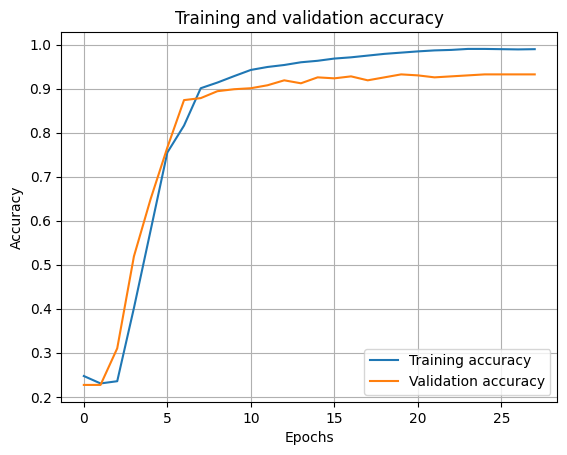

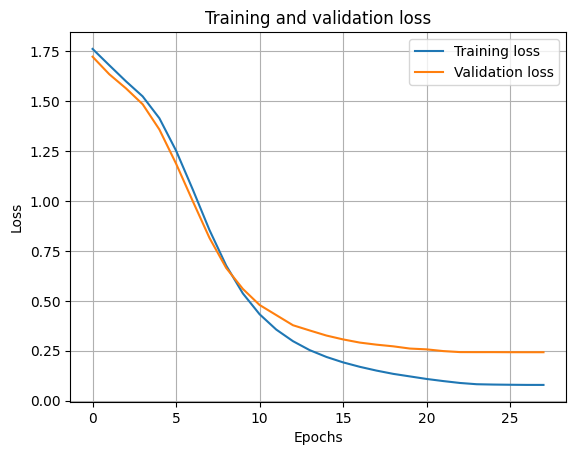

In [94]:
# # Plot training results
# plot_loss_acc(history)